In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# loading the insurance dataset 
insurance_df = pd.read_csv('insurance-2.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
# checking for nan values
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
# checking for duplicates
duplicates = insurance_df.duplicated(keep = 'first').sum()
print(f'There  are {duplicates} duplicates')

There  are 1 duplicates


In [12]:
# dropping duplicates
insurance_df = insurance_df.drop_duplicates(keep = 'first')

In [13]:
insurance_df.shape

(1337, 7)

In [14]:
# checkig for the unique values in the region column
insurance_df['region'].unique()

array([1, 2, 3, 4])

In [15]:
# converting the values in the region column to numerical 
insurance_df['region'] = insurance_df['region'].map(
    {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [16]:
insurance_df


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,NaN,16884.92
1,18,male,33.8,1,no,NaN,1725.55
2,28,male,33.0,3,no,NaN,4449.46
3,33,male,22.7,0,no,NaN,21984.47
4,32,male,28.9,0,no,NaN,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,NaN,10600.55
1334,18,female,31.9,0,no,NaN,2205.98
1335,18,female,36.9,0,no,NaN,1629.83
1336,21,female,25.8,0,no,NaN,2007.95


In [17]:
# converting the values in the sex column to numerical 
insurance_df['sex'] = insurance_df['sex'].map(
    {'male': 0, 'female': 1})
insurance_df['sex']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1337, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
#converting the values in the smoker column to numerical
label_encoder = LabelEncoder()
insurance_df['smoker'] = label_encoder.fit_transform(insurance_df['smoker'])
insurance_df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64

In [20]:
insurance_df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region      float64
expenses    float64
dtype: object

In [21]:
# finding the correlations
relationship = insurance_df.corr()
relationship

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.019814,0.109414,0.041536,-0.025587,NaN,0.298308
sex,0.019814,1.000000,-0.046405,-0.017848,-0.076596,NaN,-0.058045
bmi,0.109414,-0.046405,1.000000,0.012641,0.003964,NaN,0.198637
children,0.041536,-0.017848,0.012641,1.000000,0.007331,NaN,0.067389
smoker,-0.025587,-0.076596,0.003964,0.007331,1.000000,NaN,0.787234
region,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expenses,0.298308,-0.058045,0.198637,0.067389,0.787234,NaN,1.000000


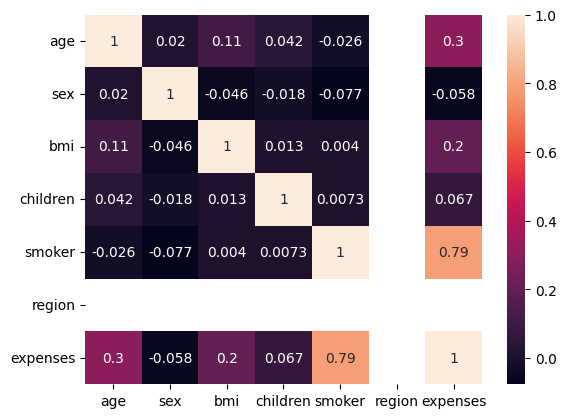

In [22]:
# visualizing the correlation
sns.heatmap(relationship, annot = True)
plt.show()

In [23]:
# dropping columns that less affect expenses
insurance_df = insurance_df.drop(columns = (['sex','children', 'region']))
insurance_df

,age,bmi,smoker,expenses
0,19,27.9,1,16884.92
1,18,33.8,0,1725.55
2,28,33.0,0,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,0,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [24]:
# checking for the maximum and minimum values for expenses columns
insurance_df['expenses'].max()
insurance_df['expenses'].min()

1121.87

In [25]:
# feature matrix and the target vector
x = insurance_df.drop('expenses', axis=1)
y = insurance_df['expenses']

In [26]:
# splitting the insurance dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42 )

In [27]:
# intiatializing the model
multi_model = LinearRegression()

In [28]:
# fitting the model
multi_model.fit(x_train, y_train)

LinearRegression()

In [29]:
# predicting the expenses using the tyest set
y_pred = multi_model.predict(x_test)

In [30]:
# calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 35843744.09023381
R-squared: 0.8049384470255434


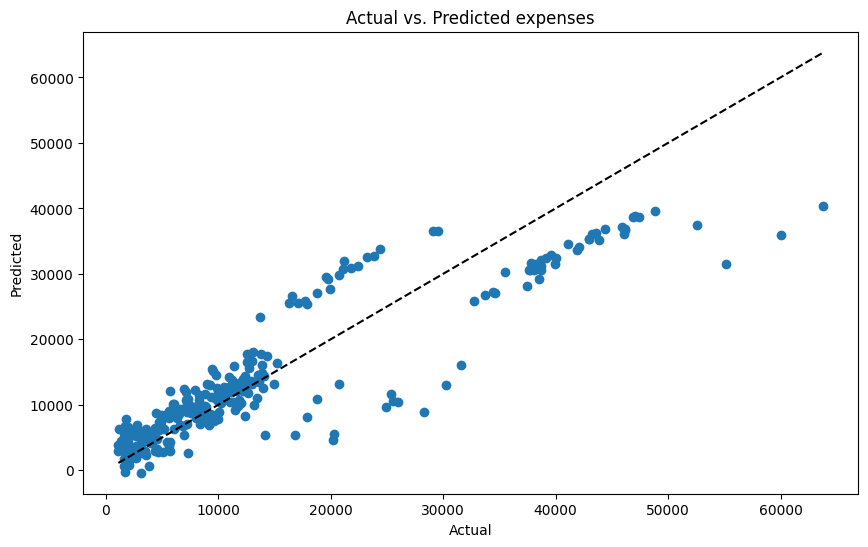

In [32]:
# plotting the actual vs the predicted values
plt. figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted expenses')
plt.show()

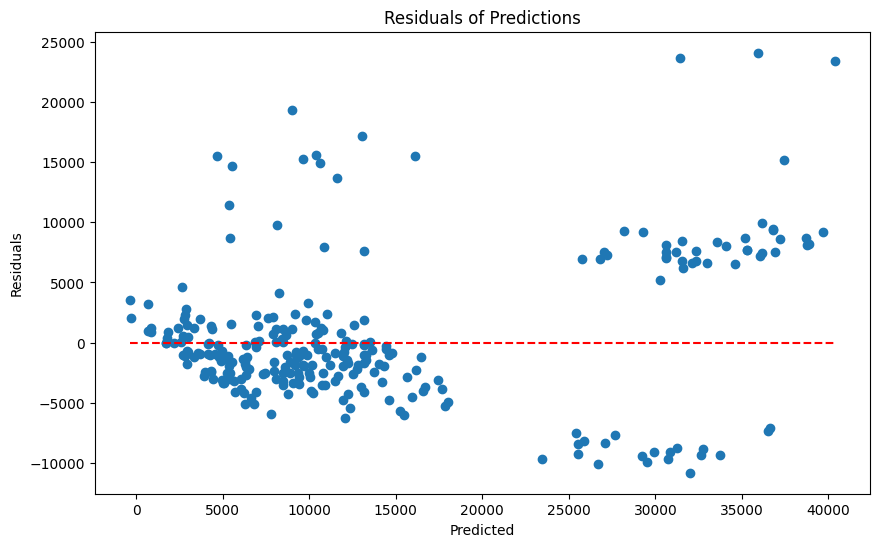

In [33]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

Based on the r2 score, the MSE and how the residuals are scattered around the horizontal line the model is performing well. 